# K-means Clustering

Referenznotebook zum Thema K-means Clustering. Für die vollständige Erklärungen bitte auch das Video nutzen.

## Angewendete Methode


K Means Clustering ist ein Unsupervised Learning Algoithmus. Dieser versucht Daten aufgrund ihrer Ähnlichkeit in Cluster einzuteilen. Unsupervised Lerning bedeutet, dass wir vorab keine Zuordnung kennen und versuchen Muster in den Daten zu erkennen, die eine Zuordnung rechtertigen.

Beim K Means Clustering definieren wir die Anzahl an Clustern, in die wir die Daten aufteilen möchten. Der Algorithmus teilt jede Beobachtung zufällig einem Cluster zu. Danach findet es den Mittelpunkt jedes Clusters. Anschließend folgt der Algorithmus den folgenden zwei Schritten:

1. Weise die Beobachtungen dem Cluster-Mittepunkt zu, der ihnen am nächsten ist.
2. Berechne neue Mittelpunkte für die angepassten Clusters.

Diese beiden Schritte werden solange wiederholt, bis die "within-cluster-variation" nicht mehr verringert werden kann. Diese wird durch die Summe der euklidische Distanz eines jeden Punktes zum Mittelpunkt seines Clusters berechnet.



## Daten einlesen


Für diese Lektion verwenden wir wie gesagt den [berühmten Iris Datensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set).

Dieser ist ein multivariater Datensatz der von Sir Ronald Discher im Jahr 1936 als Beispiel für eine Discriminant Analysis verwendet wurde.

Der Datensatz besteht aus 50 Proben für jede der drei Spezien der Lilie (en. Iris), also insgesamt 150 Einträge. Vier Merkmale wurden für jede Probe gemessen: die Länge und Breite der Kelchblätter (en. sepals) und Blütenblätter (en. petals) (in Zentimetern).


In [1]:
library(datasets)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## EDA

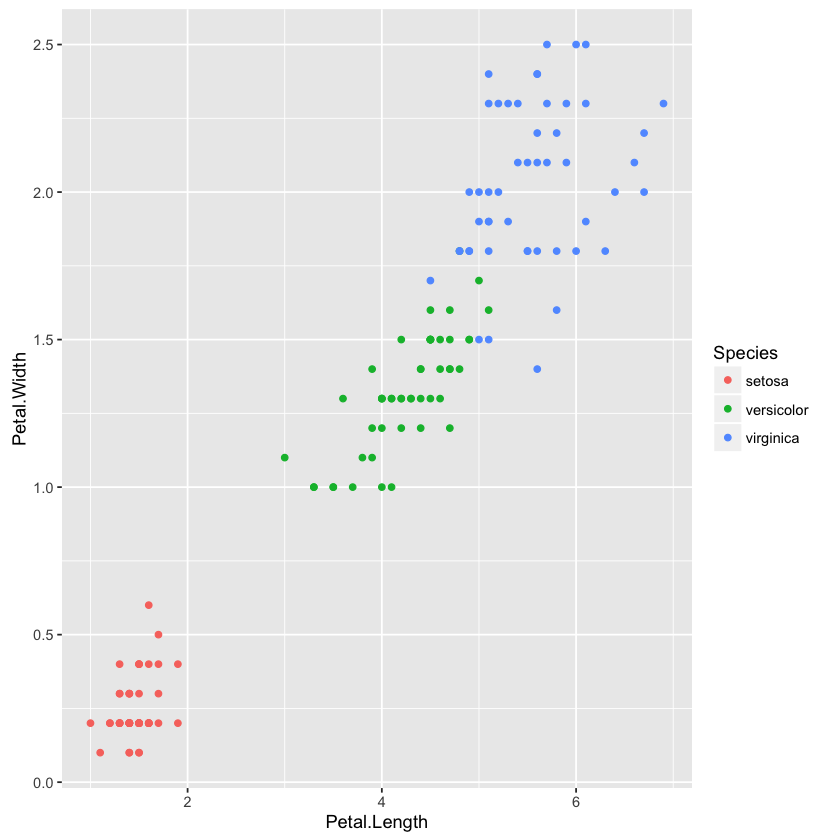

In [3]:
library(ggplot2)
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()

## Clustern

Lasst uns nun den K-means Algorithmus verwenden um die Daten zu clustern. Wir dürfen hierbei nicht vergessen, dass es sich um einen Unsupervised Learning Algorithmus handelt. D.h., dass wir keine Informationen angeben welche die richtigen Labels sind:


In [9]:
set.seed(101)

In [10]:
help(kmeans)

kmeans {stats},R Documentation
x,"numeric matrix of data, or an object that can be coerced to such a matrix (such as a numeric vector or a data frame with all numeric columns)."
centers,"either the number of clusters, say k, or a set of initial (distinct) cluster centres. If a number, a random set of (distinct) rows in x is chosen as the initial centres."
iter.max,the maximum number of iterations allowed.
nstart,"if centers is a number, how many random sets should be chosen?"
algorithm,"character: may be abbreviated. Note that ""Lloyd"" and ""Forgy"" are alternative names for one algorithm."
object,"an R object of class ""kmeans"", typically the result ob of ob <- kmeans(..)."
method,"character: may be abbreviated. ""centers"" causes fitted to return cluster centers (one for each input point) and ""classes"" causes fitted to return a vector of class assignments."
trace,"logical or integer number, currently only used in the default method (""Hartigan-Wong""): if positive (or true), tracing information on the progress of the algorithm is produced. Higher values may produce more tracing information."
...,not used.
cluster,A vector of integers (from 1:k) indicating the cluster to which each point is allocated.


In [11]:
# Glücklicherweise wissen wir schon wie viele Cluster wir bekommen
irisCluster <- kmeans(iris[, 1:4], 3, nstart = 20)
irisCluster

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [13]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         48        14
  2     50          0         0
  3      0          2        36

Wir können auch mehr Informationen über die Cluster bekommen: 

In [14]:
irisCluster

             Length Class  Mode   
cluster      150    -none- numeric
centers       12    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

Es sieht danach aus, dass wir die Setosa richtig gruppiert haben, mit einigen Überschneidungen von Versicolor und Virginica 

## Cluster Visualisieren



In [20]:
library(cluster)

In [36]:
help(clusplot)

clusplot {cluster},R Documentation
x,"an R object, here, specifically an object of class ""partition"", e.g. created by one of the functions pam, clara, or fanny."
main,"title for the plot; when NULL (by default), a title is constructed, using x$call."
dist,"when x does not have a diss nor a data component, e.g., for pam(dist(*), keep.diss=FALSE), dist must specify the dissimilarity for the clusplot."
...,"optional arguments passed to methods, notably the clusplot.default method (except for the diss one) may also be supplied to this function. Many graphical parameters (see par) may also be supplied as arguments here."


Hier können wir Zwei Komponenten darstellen und die Cluster Regionen vs. die echten Datenbeschriftungen. 


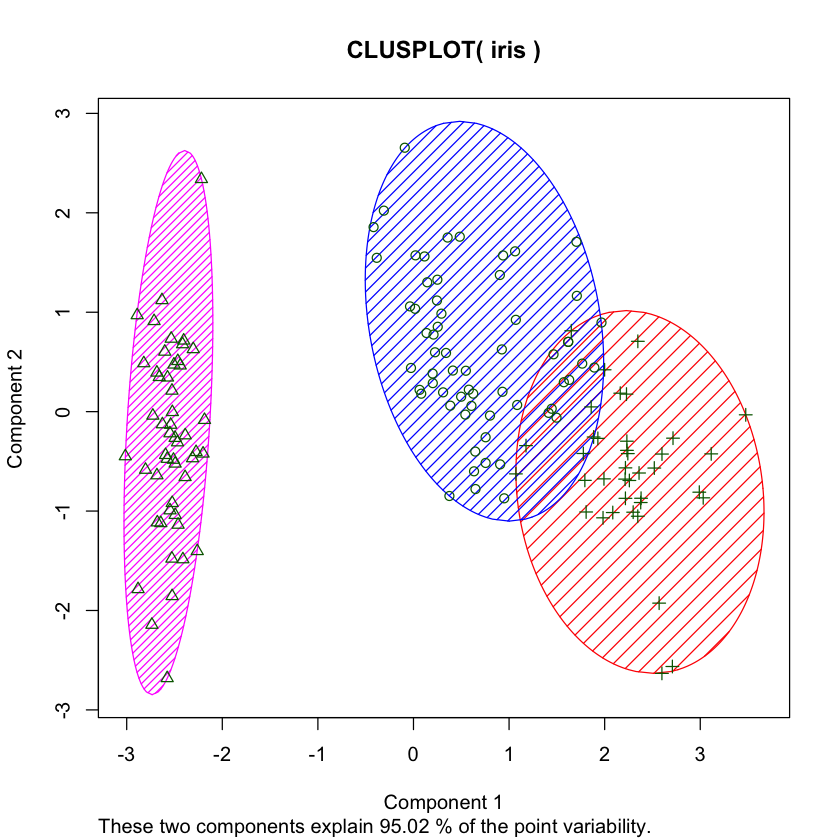

In [35]:
library(cluster) 
clusplot(iris, irisCluster$cluster, color=TRUE, shade=TRUE, labels=0,lines=0, )

## Gut gemacht! 